In [1]:
import numpy as np 
import pandas as pd
import os
import glob
from keras.layers import BatchNormalization, Conv2D, Activation, Dropout, Flatten, Dense

In [2]:
dir = 'new/*'
dir_name = dir
bark_files = glob.glob(dir_name) 

In [70]:
dir_name = dir
bark_name = glob.glob(dir_name) 
full_path = []
label = []
file_name = []
for i in bark_name:
    bark_files = glob.glob(i+'\\*')
    for j in bark_files:
        full_path.append(j)
        label.append(j.split('new\\')[1].split('\\')[0])
        file_name.append(j.split('new\\')[1].split('\\')[1])

In [71]:
df = pd.DataFrame({'full_path':path, 'label':name, 'file_name':label})
df

,full_path,label,file_name
0,new\Acacia\IMG_6348.JPG,Acacia,Acacia
1,new\Acacia\IMG_6349.JPG,Acacia,Acacia
2,new\Acacia\IMG_6350.JPG,Acacia,Acacia
3,new\Acacia\IMG_6351.JPG,Acacia,Acacia
4,new\Acacia\IMG_6352.JPG,Acacia,Acacia
...,...,...,...
5573,new\Wrightia religiosa\IMG_2372.JPG,Wrightia religiosa,Wrightia religiosa
5574,new\Wrightia religiosa\IMG_2373.JPG,Wrightia religiosa,Wrightia religiosa
5575,new\Wrightia religiosa\IMG_2374.JPG,Wrightia religiosa,Wrightia religiosa
5576,new\Wrightia religiosa\IMG_2375.JPG,Wrightia religiosa,Wrightia religiosa


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_path  5578 non-null   object
 1   label      5578 non-null   object
 2   file_name  5578 non-null   object
dtypes: object(3)
memory usage: 130.9+ KB


DataFrame is create with 2 colmuns, 
1. path will have the paths to impage in the folder 
2. Label will have the corresponding label name for the image

In [73]:
df['label']=df['label'].astype('category')

Converting the "label" column as category type

In [74]:
df['label'].value_counts()

Anacardium occidentale       239
Carica papaya                207
Dipterocarpus alatus         158
Veitchia merrilli            152
Ficus microcarpa             150
Adenium species              144
Artocarpus heterophyllus     138
Musa                         132
Eucalyptus                   127
Psidium guajava              122
Ficus racemosa               117
Terminalia catappa           113
Chrysophyllum cainino        111
Cocos nucifera               110
Hevea brasiliensis           110
Syzygium nervosum            109
Citrus aurantiifolia         108
Melaleuca                    107
Prunus salicina              105
Annona squamosa              105
Erythrina fusca              104
Artocarpus altilis           104
Nephelium lappaceum          104
Melia azedarach              103
Delonix regia                103
Gmelina arborea Roxb         103
Persea                       103
Tamarindus indica            103
Spondias mombin L            102
Tectona grandis              102
Barrington

In [75]:
Y_train = df['label'].to_numpy()


# Exploratory Data Analysis

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df['label'].unique()

['Acacia', 'Adenanthera microsperma', 'Adenium species', 'Anacardium occidentale', 'Annona squamosa', ..., 'Tectona grandis', 'Terminalia catappa', 'Veitchia merrilli', 'Wrightia', 'Wrightia religiosa']
Length: 50
Categories (50, object): ['Acacia', 'Adenanthera microsperma', 'Adenium species', 'Anacardium occidentale', ..., 'Terminalia catappa', 'Veitchia merrilli', 'Wrightia', 'Wrightia religiosa']

**Let us try plot the 1 sample image from each category**

IndexError: index 9 is out of bounds for axis 0 with size 9

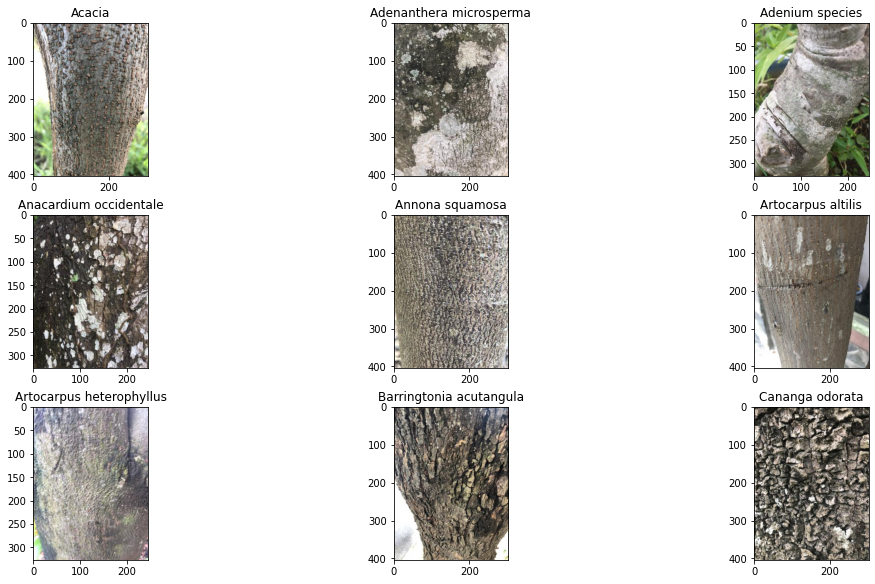

In [78]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

C:\Users\ismis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

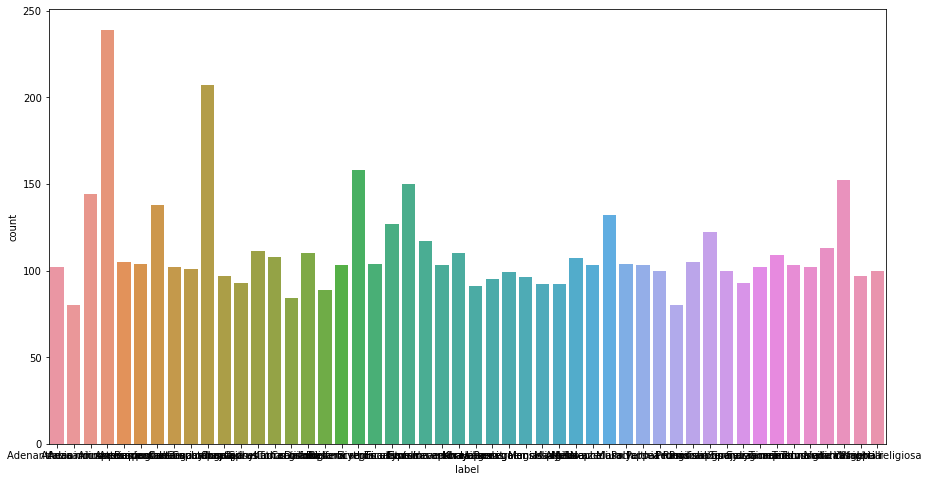

In [79]:
fig=plt.figure(figsize=(15,8))
sns.countplot(df['label'])

In [80]:
plt.imread(df['full_path'][1]).shape

(404, 303, 3)

# Train Test split

In [81]:

from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=42)

In [82]:
print(X_train.shape)
print(X_test.shape)

(4462, 3)
(1116, 3)


## Creating the image dataset using Tensorflow 
### we are using resnet_v2 preprocessing step to check if we can use Reset model in trasform learning

In [83]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='full_path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='full_path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test, x_col='full_path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 3124 validated image filenames belonging to 50 classes.
Found 1338 validated image filenames belonging to 50 classes.
Found 1116 validated image filenames belonging to 50 classes.


### Plotting image after preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
C:\Users\ismis\anaconda3\lib\site-packages\matplotlib\text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


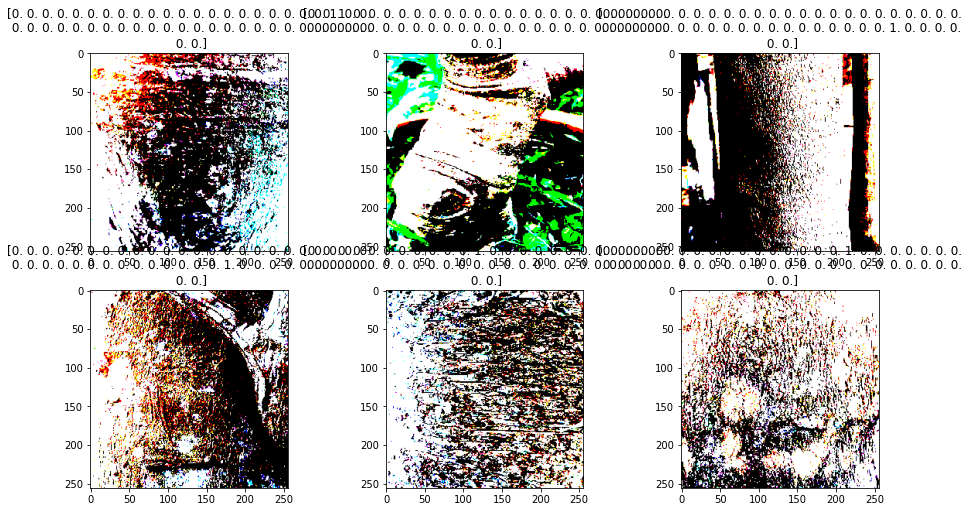

In [84]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = X_test_img.next()
    #print(img.shape)   #  (1,256,256,3)
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    #plt.show()
    j=j+1

In [85]:
X_test_img[0][0].shape

(32, 256, 256, 3)

In [86]:
image_shape=(256,256,3)

#### Lets check the classes are appropriate in both Test & Train dataset

In [87]:
X_train_img.class_indices

{'Acacia': 0,
 'Adenanthera microsperma': 1,
 'Adenium species': 2,
 'Anacardium occidentale': 3,
 'Annona squamosa': 4,
 'Artocarpus altilis': 5,
 'Artocarpus heterophyllus': 6,
 'Barringtonia acutangula': 7,
 'Cananga odorata': 8,
 'Carica papaya': 9,
 'Casuarina equisetifolia': 10,
 'Cedrus': 11,
 'Chrysophyllum cainino': 12,
 'Citrus aurantiifolia': 13,
 'Citrus grandis': 14,
 'Cocos nucifera': 15,
 'Dalbergia oliveri': 16,
 'Delonix regia': 17,
 'Dipterocarpus alatus': 18,
 'Erythrina fusca': 19,
 'Eucalyptus': 20,
 'Ficus microcarpa': 21,
 'Ficus racemosa': 22,
 'Gmelina arborea Roxb': 23,
 'Hevea brasiliensis': 24,
 'Hopea': 25,
 'Khaya senegalensis': 26,
 'Khaya senegalensis A.Juss': 27,
 'Lagerstroemia speciosa': 28,
 'Magnolia alba': 29,
 'Mangifera': 30,
 'Melaleuca': 31,
 'Melia azedarach': 32,
 'Musa': 33,
 'Nephelium lappaceum': 34,
 'Persea': 35,
 'Polyalthia longifolia': 36,
 'Prunnus': 37,
 'Prunus salicina': 38,
 'Psidium guajava': 39,
 'Pterocarpus macrocarpus': 40,


In [88]:
X_val_img.class_indices

{'Acacia': 0,
 'Adenanthera microsperma': 1,
 'Adenium species': 2,
 'Anacardium occidentale': 3,
 'Annona squamosa': 4,
 'Artocarpus altilis': 5,
 'Artocarpus heterophyllus': 6,
 'Barringtonia acutangula': 7,
 'Cananga odorata': 8,
 'Carica papaya': 9,
 'Casuarina equisetifolia': 10,
 'Cedrus': 11,
 'Chrysophyllum cainino': 12,
 'Citrus aurantiifolia': 13,
 'Citrus grandis': 14,
 'Cocos nucifera': 15,
 'Dalbergia oliveri': 16,
 'Delonix regia': 17,
 'Dipterocarpus alatus': 18,
 'Erythrina fusca': 19,
 'Eucalyptus': 20,
 'Ficus microcarpa': 21,
 'Ficus racemosa': 22,
 'Gmelina arborea Roxb': 23,
 'Hevea brasiliensis': 24,
 'Hopea': 25,
 'Khaya senegalensis': 26,
 'Khaya senegalensis A.Juss': 27,
 'Lagerstroemia speciosa': 28,
 'Magnolia alba': 29,
 'Mangifera': 30,
 'Melaleuca': 31,
 'Melia azedarach': 32,
 'Musa': 33,
 'Nephelium lappaceum': 34,
 'Persea': 35,
 'Polyalthia longifolia': 36,
 'Prunnus': 37,
 'Prunus salicina': 38,
 'Psidium guajava': 39,
 'Pterocarpus macrocarpus': 40,


In [89]:
X_test_img.class_indices

{'Acacia': 0,
 'Adenanthera microsperma': 1,
 'Adenium species': 2,
 'Anacardium occidentale': 3,
 'Annona squamosa': 4,
 'Artocarpus altilis': 5,
 'Artocarpus heterophyllus': 6,
 'Barringtonia acutangula': 7,
 'Cananga odorata': 8,
 'Carica papaya': 9,
 'Casuarina equisetifolia': 10,
 'Cedrus': 11,
 'Chrysophyllum cainino': 12,
 'Citrus aurantiifolia': 13,
 'Citrus grandis': 14,
 'Cocos nucifera': 15,
 'Dalbergia oliveri': 16,
 'Delonix regia': 17,
 'Dipterocarpus alatus': 18,
 'Erythrina fusca': 19,
 'Eucalyptus': 20,
 'Ficus microcarpa': 21,
 'Ficus racemosa': 22,
 'Gmelina arborea Roxb': 23,
 'Hevea brasiliensis': 24,
 'Hopea': 25,
 'Khaya senegalensis': 26,
 'Khaya senegalensis A.Juss': 27,
 'Lagerstroemia speciosa': 28,
 'Magnolia alba': 29,
 'Mangifera': 30,
 'Melaleuca': 31,
 'Melia azedarach': 32,
 'Musa': 33,
 'Nephelium lappaceum': 34,
 'Persea': 35,
 'Polyalthia longifolia': 36,
 'Prunnus': 37,
 'Prunus salicina': 38,
 'Psidium guajava': 39,
 'Pterocarpus macrocarpus': 40,


# Tensorflow Model
#### MobileNet Transfer learning
I tried with both Resnet & MobileNet, MobileNet gives better accuracy result

In [92]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
def create_model():
  pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)

  pre_trained.trainable=False

  inp_model = pre_trained.input
  #x=Flatten()(pre_trained.output)
  x=Dense(128, activation='relu')(pre_trained.output)
  x=Dropout(0.5)(x)
  x=Dense(128, activation='relu')(x)
  output=Dense(50, activation='softmax')(x)
  model = Model(inputs=inp_model, outputs=output)

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

model = create_model()
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 128, 128, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 128, 128, 32  128         ['Conv1[0][0]']                  
                                )                                                           

 ization)                                                                                         
                                                                                                  
 block_3_expand_relu (ReLU)     (None, 64, 64, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 65, 65, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 32, 32, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 32, 32, 144)  576        ['block_3_depthwise[0][0]']      
 malizatio

                                                                                                  
 block_6_project_BN (BatchNorma  (None, 16, 16, 64)  256         ['block_6_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 16, 16, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 16, 16, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 16, 16, 384)  0           ['block_7_expand_BN[0][0]']      
          

 block_10_depthwise_BN (BatchNo  (None, 16, 16, 384)  1536       ['block_10_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 16, 16, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 16, 16, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 16, 16, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_

 block_14_expand_relu (ReLU)    (None, 8, 8, 960)    0           ['block_14_expand_BN[0][0]']     
                                                                                                  
 block_14_depthwise (DepthwiseC  (None, 8, 8, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 8, 8, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 8, 8, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, Activation, Dropout, Flatten, Dense
from keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

%matplotlib inline


lr = 0.05
n_conv_layers = 3
n_kernels = [128] * n_conv_layers
mp_sizes = [(2,2) for _ in range(n_conv_layers)]

model = Sequential()
model.add(BatchNormalization(axis=3, input_shape=image_shape))
for i in range(n_conv_layers):
    model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_uniform"))
    model.add(BatchNormalization(axis=3))
    model.add(Activation('relu'))
    if i < n_conv_layers - 1:
        model.add(MaxPooling2D(mp_sizes[i]))
        model.add(Dropout(0.5))

model.add(Conv2D(6, (3, 3), padding="same"))
model.add(GlobalMaxPooling2D())
model.add(Activation('softmax'))
model.compile(Adam(lr), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_12 (Bat  (None, 256, 256, 3)      12        
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 256, 256, 128)     3584      
                                                                 
 batch_normalization_13 (Bat  (None, 256, 256, 128)    512       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 256, 256, 128)     0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                      

In [94]:
results = model.fit(X_train_img,batch_size=32,epochs=50,validation_data=X_val_img,)

Epoch 1/50
98/98 [==============================] - 138s 1s/step - loss: 3.0547 - accuracy: 0.2353 - val_loss: 2.0631 - val_accuracy: 0.4783
Epoch 2/50
98/98 [==============================] - 119s 1s/step - loss: 2.1629 - accuracy: 0.4091 - val_loss: 1.5541 - val_accuracy: 0.5972
Epoch 3/50
98/98 [==============================] - 133s 1s/step - loss: 1.7777 - accuracy: 0.4955 - val_loss: 1.2628 - val_accuracy: 0.6644
Epoch 4/50
98/98 [==============================] - 150s 2s/step - loss: 1.4983 - accuracy: 0.5672 - val_loss: 1.1010 - val_accuracy: 0.6966
Epoch 5/50
98/98 [==============================] - 140s 1s/step - loss: 1.3809 - accuracy: 0.5973 - val_loss: 1.1021 - val_accuracy: 0.6854
Epoch 6/50
98/98 [==============================] - 129s 1s/step - loss: 1.2696 - accuracy: 0.6216 - val_loss: 0.9409 - val_accuracy: 0.7339
Epoch 7/50
98/98 [==============================] - 128s 1s/step - loss: 1.1681 - accuracy: 0.6530 - val_loss: 0.9164 - val_accuracy: 0.7422
Epoch 8/50
98

Text(0.5, 1.0, 'Loss')

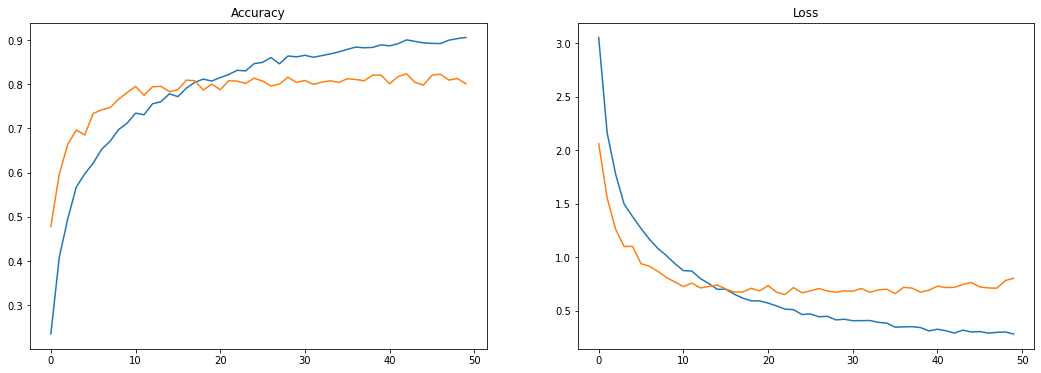

In [95]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")

# Model Prediction

In [96]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

35/35 [==============================] - 32s 840ms/step


In [97]:
X_test_img

In [99]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [105]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Final Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")

Accuracy Score: 0.8019713261648745


                                    full_path                   label  \
2633        new\Ficus microcarpa\IMG_2890.JPG        Ficus microcarpa   
1550   new\Chrysophyllum cainino\IMG_5839.JPG   Chrysophyllum cainino   
724       new\Artocarpus altilis\IMG_3284.JPG      Artocarpus altilis   
2788    new\Gmelina arborea Roxb\IMG_6074.JPG    Gmelina arborea Roxb   
468   new\Anacardium occidentale\IMG_4924.JPG  Anacardium occidentale   
2473              new\Eucalyptus\IMG_4347.JPG              Eucalyptus   

                   file_name                    pred  
2633        Ficus microcarpa        Ficus microcarpa  
1550   Chrysophyllum cainino   Chrysophyllum cainino  
724       Artocarpus altilis      Artocarpus altilis  
2788    Gmelina arborea Roxb    Gmelina arborea Roxb  
468   Anacardium occidentale  Anacardium occidentale  
2473              Eucalyptus              Eucalyptus  


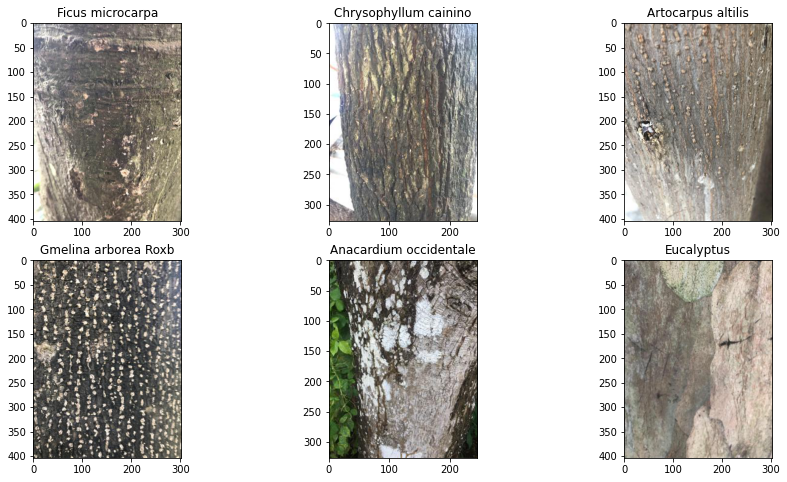

In [103]:
print(pred_df[pred_df['label']==pred_df['pred']].head(6))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['label']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['full_path'][i]))
    ax[i].set_title(imlist['label'][i])

In [104]:
pred_df

,full_path,label,file_name,pred
2633,new\Ficus microcarpa\IMG_2890.JPG,Ficus microcarpa,Ficus microcarpa,Ficus microcarpa
1550,new\Chrysophyllum cainino\IMG_5839.JPG,Chrysophyllum cainino,Chrysophyllum cainino,Chrysophyllum cainino
724,new\Artocarpus altilis\IMG_3284.JPG,Artocarpus altilis,Artocarpus altilis,Artocarpus altilis
2788,new\Gmelina arborea Roxb\IMG_6074.JPG,Gmelina arborea Roxb,Gmelina arborea Roxb,Gmelina arborea Roxb
468,new\Anacardium occidentale\IMG_4924.JPG,Anacardium occidentale,Anacardium occidentale,Anacardium occidentale
...,...,...,...,...
1557,new\Chrysophyllum cainino\IMG_5846.JPG,Chrysophyllum cainino,Chrysophyllum cainino,Chrysophyllum cainino
4678,new\Senna siamea\IMG_6037.JPG,Senna siamea,Senna siamea,Senna siamea
1743,new\Citrus grandis\IMG_4053.JPG,Citrus grandis,Citrus grandis,Citrus grandis
2098,new\Delonix regia\IMG_4573.JPG,Delonix regia,Delonix regia,Delonix regia
